In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv("/Users/davidhernandez/Documents/paper_figs/lit_review.csv")
data.describe()

,Teacher Acc. (\%),CF,Student Acc. (\%) Distilled,$\Delta$Acc.
count,57.000000,57.000000,57.000000,57.000000
mean,85.008246,11.414912,83.460526,-1.403860
std,11.585274,19.687758,12.162141,2.046513
min,47.650000,0.000000,44.710000,-8.630000
25%,77.940000,1.910000,75.150000,-2.400000
50%,86.700000,3.300000,84.570000,-0.960000
75%,95.240000,15.530000,94.490000,-0.210000
max,99.540000,127.020000,99.550000,4.210000


In [3]:
data = data.dropna(subset='CF')

In [4]:
data.describe()

,Teacher Acc. (\%),CF,Student Acc. (\%) Distilled,$\Delta$Acc.
count,57.000000,57.000000,57.000000,57.000000
mean,85.008246,11.414912,83.460526,-1.403860
std,11.585274,19.687758,12.162141,2.046513
min,47.650000,0.000000,44.710000,-8.630000
25%,77.940000,1.910000,75.150000,-2.400000
50%,86.700000,3.300000,84.570000,-0.960000
75%,95.240000,15.530000,94.490000,-0.210000
max,99.540000,127.020000,99.550000,4.210000


In [5]:
data.head()

,Teacher Acc. (\%),CF,Student Acc. (\%) Baseline,Student Acc. (\%) Distilled,$\Delta$Acc.,Rel. $\Delta$Acc. (\%),Dataset,Article
0,99.48,15.70,-,99.28,-0.20,-,MNIST,wang2019private
1,99.48,32.23,-,98.94,-0.54,-,MNIST,wang2019private
2,96.36,20.14,-,95.39,-0.97,-,SVHN,wang2019private
3,96.36,45.25,-,94.49,-1.87,-,SVHN,wang2019private
4,86.35,6.00,-,84.57,-1.78,-,CIFAR10,wang2019private


In [6]:
len(data['Dataset'].unique()), len(data['CF']), len(data['Student Acc. (\\%) Distilled'])

(11, 57, 57)

In [7]:
mean_acc = data['Student Acc. (\\%) Distilled'].mean()
mean_cf = data['CF'].mean()
mean_acc, mean_cf

(83.46052631578945, 11.414912280701754)

In [8]:
# # List of datasets to keep
# datasets_to_keep = ['MNIST', 'SVHN', 'CIFAR10', 'CIFAR100', 'ImageNet', 'Tiny-ImageNet']

# # Filter the DataFrame to only keep rows where the 'Dataset' column matches one of the specified datasets
# data = data[data['Dataset'].isin(datasets_to_keep)]

In [9]:
data = data[data['CF'] != 0]

In [10]:
data.describe()

,Teacher Acc. (\%),CF,Student Acc. (\%) Distilled,$\Delta$Acc.
count,54.000000,54.000000,54.000000,54.000000
mean,85.561296,12.049074,83.977593,-1.427407
std,11.456217,20.044018,12.100991,2.098371
min,47.650000,1.360000,44.710000,-8.630000
25%,78.317500,1.947500,75.902500,-2.557500
50%,86.700000,3.435000,85.355000,-0.965000
75%,95.352500,15.530000,94.520000,-0.202500
max,99.540000,127.020000,99.550000,4.210000


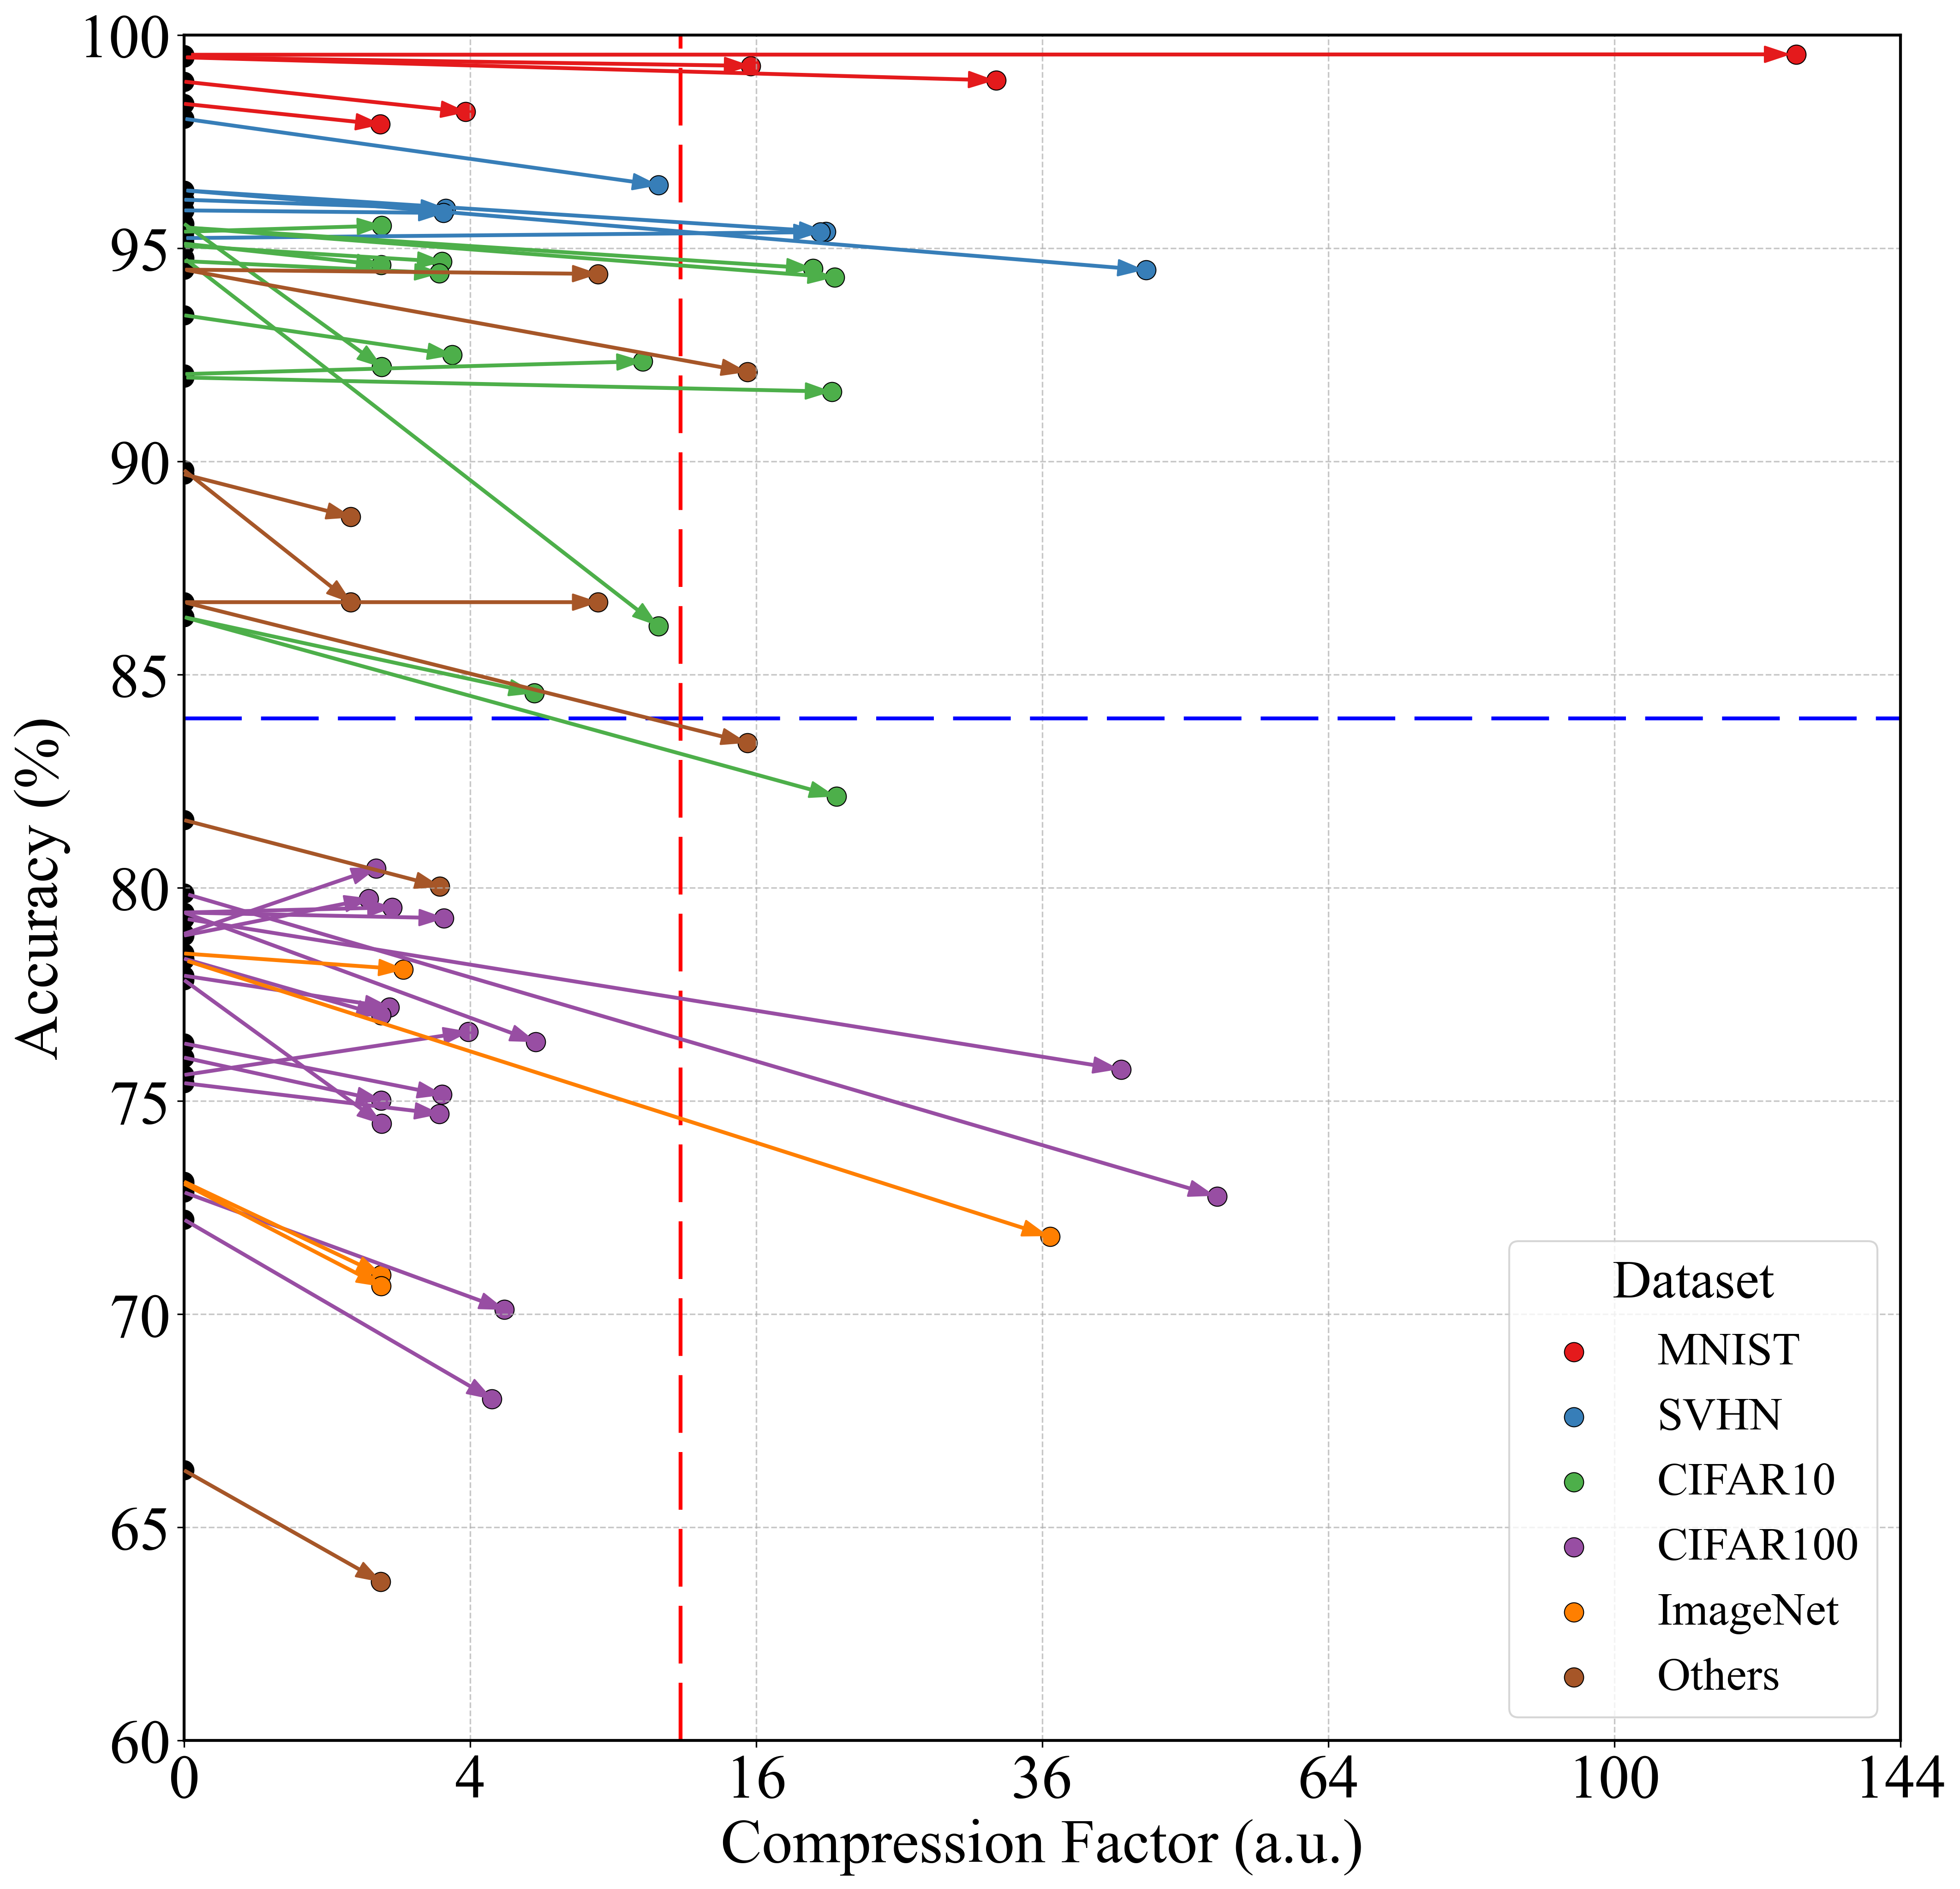

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set custom colors for all datasets
colors = sns.color_palette("Set1", n_colors=len(data['Dataset'].unique()))

# Define grouped datasets
grouped_datasets = ['DukeMTMCreID', 'Caltech256', 'Market1501', 'CelebA', 'CUHK03', 'Tiny-ImageNet']
data['Dataset Grouped'] = data['Dataset'].apply(lambda x: 'Others' if x in grouped_datasets else x)

# Get unique grouped datasets for plotting
unique_datasets = data['Dataset Grouped'].unique()

# Create a custom color dictionary
color_dict = {}
for i, dataset in enumerate(unique_datasets):
    if dataset == 'Others':
        color_dict[dataset] = '#a65628'  # Custom brown color for "Others"
    else:
        color_dict[dataset] = colors[i]

# Configure plot settings for EPS compatibility
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 32
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = False  # Set to True only if you have LaTeX installed

# Create figure and axes with higher DPI for better quality
plt.figure(figsize=(16, 16), dpi=300)
ax = plt.gca()

# Plot dashed lines
dash = (15, 5)
mean_acc = data['Student Acc. (\\%) Distilled'].mean()
mean_cf = data['CF'].mean()
ax.axhline(y=0, color='black', linestyle='--', linewidth=2.0, dashes=dash)
ax.axhline(y=mean_acc, color="blue", linestyle='--', linewidth=2.0, dashes=dash)
ax.axvline(x=mean_cf**.5, color="red", linestyle='--', linewidth=2.0, dashes=dash)

# Scatter plot and arrows for each dataset group with custom colors
for dataset in unique_datasets:
    subset = data[data['Dataset Grouped'] == dataset]
    ax.scatter(subset['CF'] ** .5, subset['Student Acc. (\\%) Distilled'], 
               color=color_dict[dataset], label=dataset, s=100, edgecolors='black', linewidths=0.5)
    ax.scatter(subset['CF'] * 0, subset['Teacher Acc. (\\%)'], 
               color="black", s=100, edgecolors='black', linewidths=0.5)
    
    # Draw arrows from teacher's accuracy at CF=0 to each student's accuracy at their CF
    for _, row in subset.iterrows():
        ax.annotate('', 
                   xy=(row['CF'] ** 0.5, row['Student Acc. (\\%) Distilled']), 
                   xytext=(0, row['Teacher Acc. (\\%)']),
                   arrowprops=dict(color=color_dict[dataset], 
                                  shrink=0.005, 
                                  width=1, 
                                  headwidth=8))

# Label and title configuration with proper LaTeX escaping
plt.xlabel("Compression Factor (a.u.)", fontsize=32)
plt.ylabel("Accuracy (%)", fontsize=32)

# Create legend with larger font size and better spacing
plt.legend(title="Dataset", title_fontsize=28, fontsize=24, 
           loc='best')

# Configure grid and axes limits
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(60, 100)
plt.xlim(0, 12)
plt.xticks([0, 2, 4, 6, 8, 10, 12], [0, 4, 16, 36, 64, 100, 144])

# Thicker axes lines
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Save with EPS-specific settings
plt.savefig("Hernandez2024_lit_review_plot.pdf",
            bbox_inches='tight')

plt.show()